***Problem Statement***

**Simple linear regression model involving 2 variables where Percentage obtained is a dependent variable and no. of study hours is an independent variable**

**Importing useful libraries**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Loading the dataset**

In [2]:
df=pd.read_csv('Task1.csv')

In [3]:
df.head() #Displays the first 5 records from the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Checking Null Values**

In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

**Statistical Summary**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**Data Visualization**

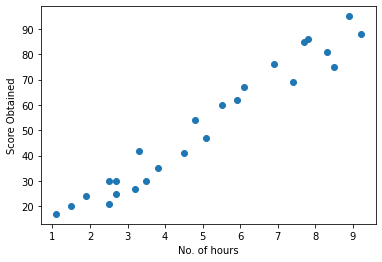

In [38]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('No. of hours')
plt.ylabel('Score Obtained')
plt.show()

**Calculating Pearson's Correlation Coefficient**

In [7]:
df.corr(method='pearson') 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Splitting the Dataset**

In [8]:
y=df.iloc[:,1:2]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [9]:
x=df.iloc[:,:1]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

**Model Training**

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

**Model Testing**

In [17]:
ypred=model.predict(x_test)
ypred

array([[16.3158208 ],
       [52.56027486],
       [34.43804783],
       [33.43125744],
       [46.51953252],
       [75.71645385],
       [12.28865924],
       [56.58743642]])

**Evaluating Model Performance** 

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_sqr=r2_score(y_test,ypred)
print("Root mean square error is: ",RMSE)
print("Coefficient of Determination, R-Square is: ",r_sqr)

Root mean square error is:  5.617521019639599
Coefficient of Determination, R-Square is:  0.8944542088325093


In [25]:
print('Intercept for line of best fit is: ',model.intercept_)
print('Slope for line of best fit is: ',model.coef_)

Intercept for line of best fit is:  [1.21396494]
Slope for line of best fit is:  [[10.06790391]]


**Predicted score for 9.25hrs/day of study**

In [37]:
x_new=np.array([9.25])
x_new1=np.reshape(x_new,(-1,1))
y_new=model.predict(x_new1)
print(y_new)

[[94.34207607]]


**Plotting the obtained line of best fit**

In [46]:
x_best=np.linspace(1.1,9.2,num=50)
print(x_best)

[1.1        1.26530612 1.43061224 1.59591837 1.76122449 1.92653061
 2.09183673 2.25714286 2.42244898 2.5877551  2.75306122 2.91836735
 3.08367347 3.24897959 3.41428571 3.57959184 3.74489796 3.91020408
 4.0755102  4.24081633 4.40612245 4.57142857 4.73673469 4.90204082
 5.06734694 5.23265306 5.39795918 5.56326531 5.72857143 5.89387755
 6.05918367 6.2244898  6.38979592 6.55510204 6.72040816 6.88571429
 7.05102041 7.21632653 7.38163265 7.54693878 7.7122449  7.87755102
 8.04285714 8.20816327 8.37346939 8.53877551 8.70408163 8.86938776
 9.03469388 9.2       ]


In [45]:
x_best1=np.reshape(x_best,(-1,1))
y_best=model.predict(x_best1)
print(y_best)

[[12.28865924]
 [13.95294539]
 [15.61723155]
 [17.2815177 ]
 [18.94580386]
 [20.61009002]
 [22.27437617]
 [23.93866233]
 [25.60294848]
 [27.26723464]
 [28.9315208 ]
 [30.59580695]
 [32.26009311]
 [33.92437926]
 [35.58866542]
 [37.25295158]
 [38.91723773]
 [40.58152389]
 [42.24581004]
 [43.9100962 ]
 [45.57438236]
 [47.23866851]
 [48.90295467]
 [50.56724082]
 [52.23152698]
 [53.89581314]
 [55.56009929]
 [57.22438545]
 [58.8886716 ]
 [60.55295776]
 [62.21724392]
 [63.88153007]
 [65.54581623]
 [67.21010238]
 [68.87438854]
 [70.5386747 ]
 [72.20296085]
 [73.86724701]
 [75.53153316]
 [77.19581932]
 [78.86010547]
 [80.52439163]
 [82.18867779]
 [83.85296394]
 [85.5172501 ]
 [87.18153625]
 [88.84582241]
 [90.51010857]
 [92.17439472]
 [93.83868088]]


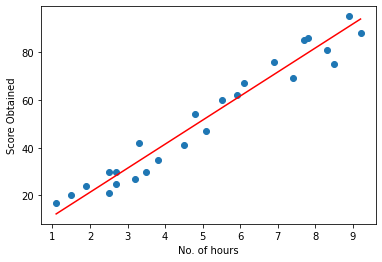

In [48]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('No. of hours')
plt.ylabel('Score Obtained')
plt.plot(x_best,y_best,color='red')
plt.show()

***Conclusions***

1) From the obtained scatter plot it's clear there exist a strong positive correlation between the 2 given variables, this is supported by the pearson's correlation coefficient value of 0.97.

2) RMSE and R-Square value of the fitted model are 5.62 and 0.89 respectively suggesting the model is fairly good.

3) Further improvement of the model will require more data points or a large dataset for training and testing.